# Extracción de texto de guión de película

## The Joker movie, as per seen in 2019
---


# Análisis del Guión de Joker (2019): Un Estudio de Relaciones y Emociones

## Introducción y Objetivos
Este proyecto realiza un análisis computacional del guión de "Joker" (2019) utilizando técnicas de procesamiento de texto y análisis de redes. 

### Objetivos
1. Analizar las relaciones entre personajes
2. Identificar patrones emocionales en la narrativa
3. Examinar la frecuencia de palabras clave
4. Visualizar la evolución de elementos narrativos

### Metodología
Se utiliza ScriptAnalyzer para procesar el PDF del guión, junto con:
- NetworkX para análisis de redes
- Matplotlib para visualizaciones
- WordCloud para análisis de frecuencia de palabras
- PyPDF2 para la extracción de texto

In [1]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import PyPDF2
import re
from collections import Counter
import numpy as np

class ScriptAnalyzer: # aquí se define la clase ScriptAnalyzer
    def __init__(self, file_path):
        self.file_path = file_path 
        self.full_text = "" # se inicializa la variable full_text
        self.characters = [] # se inicializa la lista de personajes
        self.scenes = [] # se inicializa la lista de escenas
        
    def extract_text(self): # aquí se define la función extract_text
        """Extracts text from the PDF script"""
        try:
            with open(self.file_path, 'rb') as file: # se abre el archivo en modo lectura binaria
                pdf_reader = PyPDF2.PdfReader(file) # se lee el archivo PDF
                for page in pdf_reader.pages: # se recorren las páginas del PDF
                    self.full_text += page.extract_text() # se extrae el texto de cada página y se guarda en la variable full_text
                return True # si todo sale bien, se devuelve True
        except Exception as e: # aquí se define la excepción
            print(f"Error reading the file: {str(e)}") # en caso de error, se imprime el mensaje de error
            return False

    def analyze_characters(self): # aquí se define la función analyze_characters, que analiza los personajes
        """Analyzes character appearances and dialogues"""
        # Looking for character names (usually in caps before dialogue)
        characters = re.findall(r'\b[A-Z]{2,}(?:\s+[A-Z]{2,})*\b', self.full_text) # se buscan los nombres de los personajes en mayúsculas
        # Filter out common script elements that appear in caps
        common_elements = {'INT', 'EXT', 'CUT', 'FADE', 'DISSOLVE', 'TO', 'THE', 'AND', 'CONTINUED'} # se definen los elementos comunes que se deben filtrar
        filtered_chars = [char for char in characters if char not in common_elements] # se filtran los personajes que no son elementos comunes
        return dict(Counter(filtered_chars).most_common(10)) # se devuelven los 10 personajes más comunes

    def analyze_emotions_and_actions(self):
        """Analyzes emotional content and key actions"""
        emotions = {
            'laugh/smile': len(re.findall(r'\b(laughs?|smiles?|grinning|chuckles?)\b', self.full_text.lower())),
            'cry/tears': len(re.findall(r'\b(crying|tears|sobs?|weeps?)\b', self.full_text.lower())),
            'angry': len(re.findall(r'\b(angry|fury|rage|mad)\b', self.full_text.lower())),
            'fear': len(re.findall(r'\b(fear|scared|afraid|terrified)\b', self.full_text.lower())),
            'silence': len(re.findall(r'\b(silence|quiet|pause|beat)\b', self.full_text.lower())),
            'dance': len(re.findall(r'\b(dance|dancing|moves)\b', self.full_text.lower()))  # Specific for Joker
        }
        return emotions

    def generate_statistics(self): # aquí se define la función generate_statistics
        """Generates general script statistics"""
        stats = {
            'total_words': len(self.full_text.split()), # se cuentan las palabras del guion
            'total_lines': len(self.full_text.splitlines()), # se cuentan las líneas del guion
            'approximate_scenes': len(re.findall(r'(INT\.|EXT\.)', self.full_text)), # se cuentan las escenas aproximadas
            'average_line_length': np.mean([len(line.split()) # se calcula la longitud promedio de las líneas
                                          for line in self.full_text.splitlines() # se recorren las líneas del guion
                                          if line.strip()]),   # se eliminan los espacios en blanco
            'parentheticals': len(re.findall(r'\(.*?\)', self.full_text))  # se cuentan las descripciones de acción (paréntesis)
        }
        return stats

    def analyze_locations(self):    # aquí se define la función analyze_locations
        """Identifies main locations in the script"""
        # Looking for INT./EXT. scene headers followed by location
        locations = re.findall(r'(?:INT\.|EXT\.)\s+(.*?)(?=\n|$)', self.full_text) # se buscan las locaciones principales en el guion
        return Counter(locations).most_common(5) # se devuelven las 5 locaciones más comunes

    def analyze_time_of_day(self): # aquí se define la función analyze_time_of_day
        """Analyzes when scenes take place"""
        time_indicators = re.findall(r'(?:INT\.|EXT\.)[^-]+-\s*(DAY|NIGHT|MORNING|EVENING|DAWN|DUSK)', self.full_text) # se buscan los indicadores de tiempo en el guion
        return dict(Counter(time_indicators)) # se devuelven los indicadores de tiempo

    def find_key_props(self): # aquí se define la función find_key_props, es decir, encuentra los elementos clave
        """Identifies potentially important props and elements"""
        key_joker_items = {
            'gun': len(re.findall(r'\b(gun|revolver|weapon)\b', self.full_text.lower())), # se buscan las armas en el guion
            'makeup': len(re.findall(r'\b(makeup|paint|clown)\b', self.full_text.lower())), # se buscan los elementos de maquillaje en el guion
            'mirror': len(re.findall(r'\bmirror\b', self.full_text.lower())), # se buscan los espejos en el guion
            'notebook': len(re.findall(r'\b(notebook|journal|diary)\b', self.full_text.lower())), # se buscan los cuadernos en el guion
            'cigarette': len(re.findall(r'\b(cigarette|smoking)\b', self.full_text.lower())) # se buscan los cigarrillos en el guion
        }
        return key_joker_items

    def generate_report(self): # aquí se define la función generate_report
        """Generates a complete analysis report"""
        stats = self.generate_statistics()
        characters = self.analyze_characters() # se analizan los personajes
        emotions = self.analyze_emotions_and_actions() # se analizan las emociones y acciones
        locations = self.analyze_locations() # se analizan las locaciones
        time_analysis = self.analyze_time_of_day() # se analiza el tiempo del día
        props = self.find_key_props() 
        
        report = f"""
🎬 JOKER SCRIPT ANALYSIS 🃏
==========================

📊 GENERAL STATISTICS:
- Total words: {stats['total_words']:,} # se imprimen las estadísticas generales
- Total lines: {stats['total_lines']:,} # se imprimen las estadísticas generales
- Approximate scenes: {stats['approximate_scenes']} 
- Average line length: {stats['average_line_length']:.2f} words
- Action descriptions (parentheticals): {stats['parentheticals']}

👥 MOST MENTIONED CHARACTERS:
{self._format_dict(characters)} 

📍 MAIN LOCATIONS:
{self._format_list(locations)}

⏰ TIME OF DAY DISTRIBUTION:
{self._format_dict(time_analysis)}

😊 EMOTIONAL CONTENT & ACTIONS:
{self._format_dict(emotions)}

🎭 KEY PROPS & ELEMENTS:
{self._format_dict(props)}
"""
        return report

    def _format_dict(self, d):
        return '\n'.join([f"- {k}: {v}" for k, v in d.items()])

    def _format_list(self, l):
        return '\n'.join([f"- {item[0]}: {item[1]}" for item in l])

# Example usage
if __name__ == "__main__":
    analyzer = ScriptAnalyzer("joker_new_final.pdf")
    if analyzer.extract_text():
        print(analyzer.generate_report())


🎬 JOKER SCRIPT ANALYSIS 🃏

📊 GENERAL STATISTICS:
- Total words: 23,166 # se imprimen las estadísticas generales
- Total lines: 3,779 # se imprimen las estadísticas generales
- Approximate scenes: 125 
- Average line length: 6.13 words
- Action descriptions (parentheticals): 265

👥 MOST MENTIONED CHARACTERS:
- ARTHUR: 159
- MURRAY FRANKLIN: 51
- JOKER: 37
- PENNY: 33
- CONTINUOUS: 29
- MOM: 29
- APARTMENT: 27
- ON TV: 27
- TV: 24
- RANDALL: 24 

📍 MAIN LOCATIONS:
- TALK SHOW SET, STAGE - STUDIO 4B - CONTINUOUS: 4
- MOM'S APARTMENT, LIVING ROOM - NIGHT: 3
- SOPHIE'S APARTMENT, LIVING ROOM - CONTINUOUS: 3
- SIDE ALLEY, TENEMENTS - EARLY DUSK: 2
- STEEP STAIRWAY, TENEMENTS - DUSK: 2

⏰ TIME OF DAY DISTRIBUTION:
- MORNING: 13
- DUSK: 8
- EVENING: 1
- NIGHT: 27
- DAY: 2

😊 EMOTIONAL CONTENT & ACTIONS:
- laugh/smile: 81
- cry/tears: 10
- angry: 7
- fear: 8
- silence: 59
- dance: 22

🎭 KEY PROPS & ELEMENTS:
- gun: 33
- makeup: 56
- mirror: 4
- notebook: 27
- cigarette: 14



# WordCloud for full script

Este código de a continuación

- Limpia el texto removiendo elementos típicos de guiones que no queremos en nuestro análisis (direcciones de escena, acotaciones, etc.)
- Define una lista de stopwords específica para guiones cinematográficos
- Genera una nube de palabras con:

Fondo negro (temáticamente apropiado para Joker)

Paleta de colores en tonos rojos y morados

Tamaño grande para mejor visualización

Máximo de 100 palabras más frecuentes


Muestra también un listado de las 20 palabras más frecuentes con su conteo

La visualización te permitirá ver rápidamente los temas y palabras más prominentes en el guión. Las palabras más grandes son las que aparecen con más frecuenci

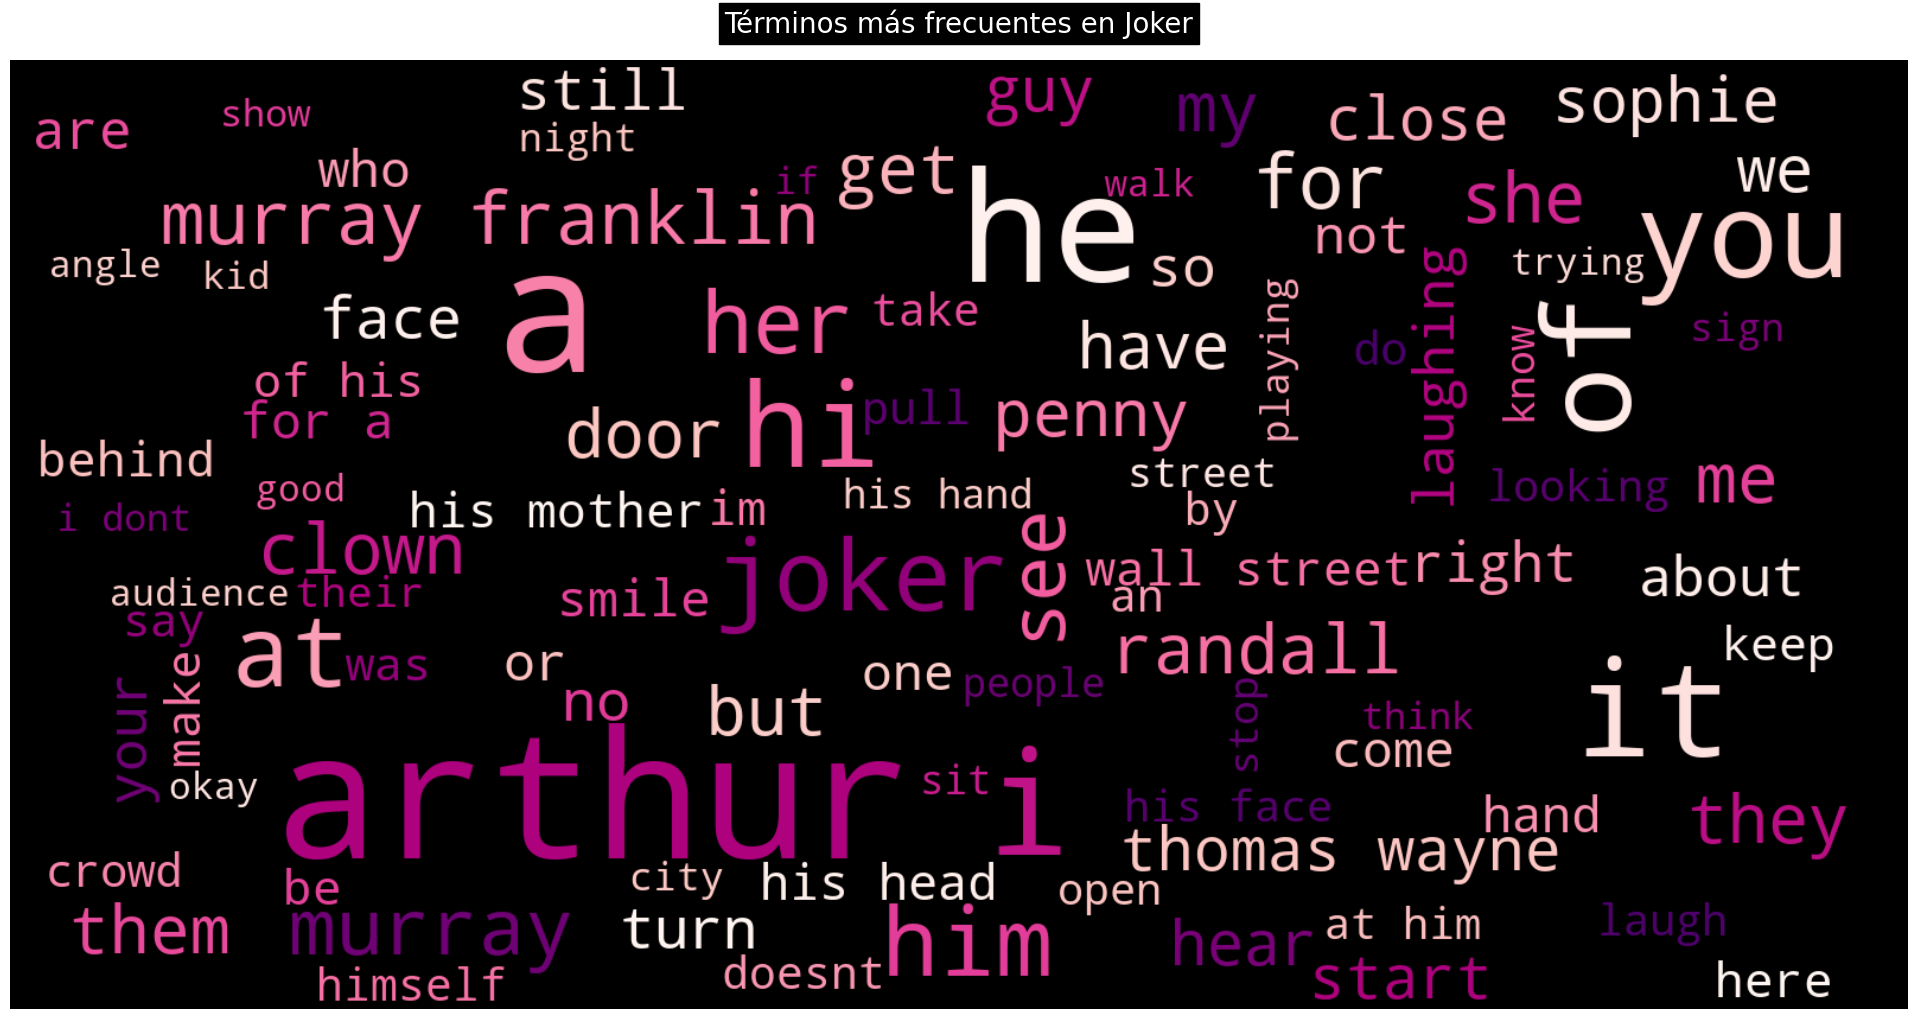


Palabras más frecuentes:
arthur: 483
his: 424
you: 312
him: 189
murray: 145
for: 136
joker: 122
her: 107
franklin: 84
hes: 75
its: 74
face: 73
wayne: 70
street: 67
was: 65
them: 62
know: 61
one: 61
penny: 61
dont: 60


In [ ]:
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

class JokerWordCloudAnalyzer: # aquí se define la clase JokerWordCloudAnalyzer
    def __init__(self, file_path):
        self.file_path = file_path
        self.full_text = ""
        
    def extract_text(self):
        """Extrae el texto del PDF"""
        try:
            with open(self.file_path, 'rb') as file: # se abre el archivo en modo lectura binaria
                pdf_reader = PyPDF2.PdfReader(file) # se lee el archivo PDF
                for page in pdf_reader.pages:
                    self.full_text += page.extract_text()
                return True
        except Exception as e:
            print(f"Error al leer el archivo: {str(e)}")
            return False
    
    def clean_text(self):
        """Limpia y prepara el texto para el análisis"""
        # Convertir a minúsculas
        text = self.full_text.lower()
        
        # Remover direcciones de escena comunes en guiones
        text = re.sub(r'int\.|ext\.', '', text)
        
        # Remover nombres de personajes en mayúsculas seguidos de ':'
        text = re.sub(r'\b[A-Z]+\s*:', '', text)
        
        # Remover acotaciones entre paréntesis
        text = re.sub(r'\(.*?\)', '', text)
        
        # Remover números
        text = re.sub(r'\d+', '', text)
        
        # Remover puntuación
        text = re.sub(r'[^\w\s]', '', text)
        
        return text
    
    def get_stopwords(self):
        """Define palabras a excluir específicas para este guión"""
        common_script_words = set([
            'cut', 'to', 'the', 'and', 'fade', 'in', 'out', 'continuous',
            'beat', 'look', 'looks', 'back', 'now', 'then', 'just', 'like',
            'away', 'around', 'down', 'up', 'off', 'on', 'over', 'under',
            'through', 'into', 'from', 'with', 'without', 'this', 'that',
            'these', 'those', 'there', 'what', 'where', 'when', 'why', 'how',
            'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
            'some', 'such', 'than', 'too', 'very', 'can', 'will', 'might'
        ])
        return common_script_words
    
    def generate_wordcloud(self):
        """Genera la nube de palabras"""
        # Limpiar el texto
        clean_text = self.clean_text()
        
        # Configurar la nube de palabras
        wordcloud = WordCloud(
            width=1600, 
            height=800,
            background_color='black',
            colormap='RdPu', # Usando una paleta de rojos y morados
            max_words=100,
            stopwords=self.get_stopwords(),
            min_font_size=10,
            max_font_size=150
        ).generate(clean_text)
        
        # Crear la visualización
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear') # interpolation='bilinear' para suavizar los bordes
        plt.axis('off')
        plt.title('Términos más frecuentes en Joker', 
                 fontsize=20, 
                 color='white', 
                 pad=20,
                 backgroundcolor='black')
        plt.tight_layout(pad=0)
        
        return wordcloud
    
    def get_top_words(self, n=20):
        """Obtiene las palabras más frecuentes y su conteo"""
        clean_text = self.clean_text()
        words = clean_text.split()
        stopwords = self.get_stopwords()
        
        # Filtrar palabras y contar frecuencias
        word_freq = Counter(word for word in words if word not in stopwords and len(word) > 2) # se filtran las palabras y se cuentan las frecuencias
        
        return word_freq.most_common(n)

# Uso del analizador
analyzer = JokerWordCloudAnalyzer("joker_new_final.pdf")
if analyzer.extract_text():
    # Generar y mostrar la nube de palabras
    wordcloud = analyzer.generate_wordcloud()
    plt.show()
    
    # Mostrar las palabras más frecuentes
    print("\nPalabras más frecuentes:")
    print("=======================")
    for word, freq in analyzer.get_top_words():
        print(f"{word}: {freq}")

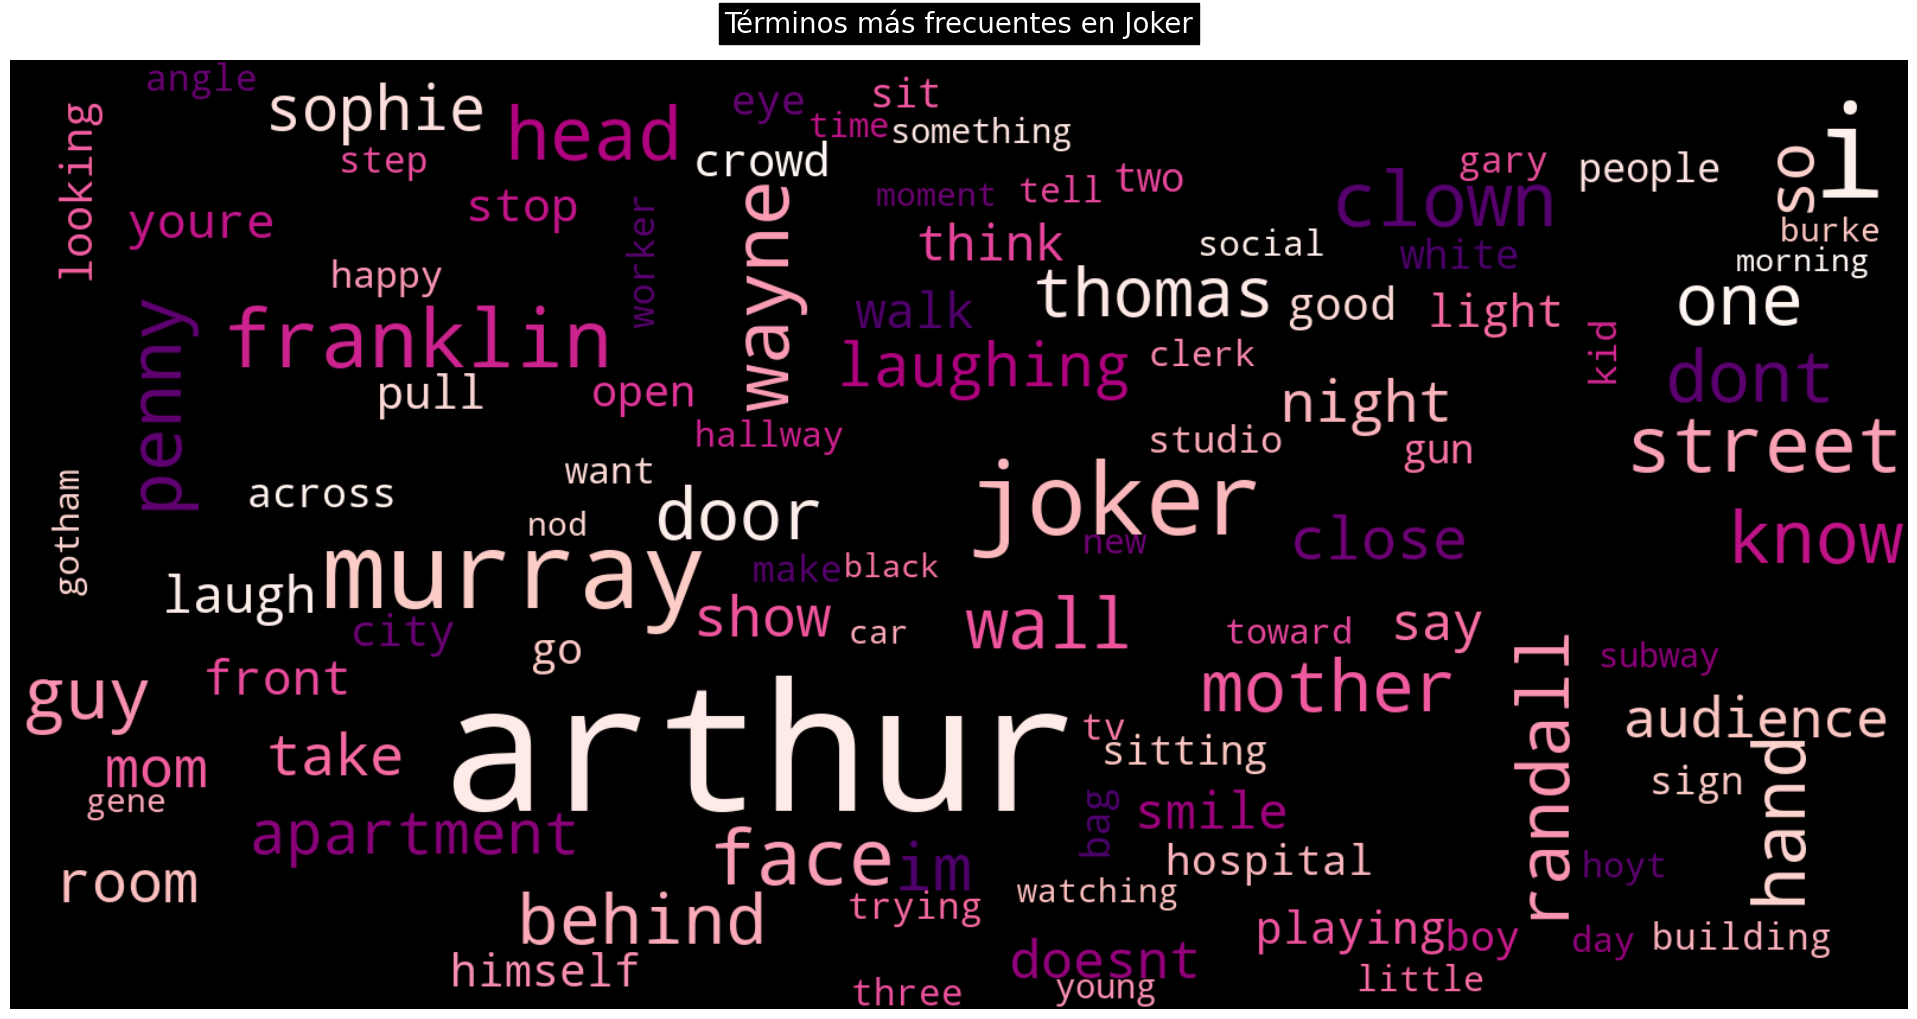


Palabras más frecuentes:
arthur: 483
murray: 145
joker: 122
franklin: 84
face: 73
wayne: 70
street: 67
know: 61
one: 61
penny: 61
dont: 60
behind: 57
thomas: 56
wall: 56
randall: 54
head: 52
laughing: 48
arthurs: 48
apartment: 48
door: 48


In [3]:
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

class JokerWordCloudAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.full_text = ""
        
    def extract_text(self):
        """Extrae el texto del PDF"""
        try:
            with open(self.file_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page in pdf_reader.pages:
                    self.full_text += page.extract_text()
                return True
        except Exception as e:
            print(f"Error al leer el archivo: {str(e)}")
            return False
    
    def clean_text(self):
        """Limpia y prepara el texto para el análisis"""
        # Convertir a minúsculas
        text = self.full_text.lower()
        
        # Remover direcciones de escena comunes
        text = re.sub(r'int\.|ext\.', '', text)
        
        # Remover nombres de personajes en mayúsculas seguidos de ':'
        text = re.sub(r'\b[A-Z]+\s*:', '', text)
        
        # Remover acotaciones entre paréntesis
        text = re.sub(r'\(.*?\)', '', text)
        
        # Remover números
        text = re.sub(r'\d+', '', text)
        
        # Remover puntuación
        text = re.sub(r'[^\w\s]', '', text)
        
        return text
    
    def get_stopwords(self):
        """Lista expandida de palabras a excluir"""
        common_script_words = set([
            # Palabras básicas de guión
            'cut', 'to', 'the', 'and', 'fade', 'in', 'out', 'continuous',
            'beat', 'look', 'looks', 'back', 'now', 'then', 'just', 'like',
            
            # Pronombres
            'he', 'she', 'it', 'they', 'we', 'you', 'him', 'her', 'them',
            'his', 'hers', 'its', 'their', 'theirs', 'my', 'mine', 'your',
            'yours', 'our', 'ours', 'who', 'whom', 'whose',
            
            # Preposiciones y artículos
            'away', 'around', 'down', 'up', 'off', 'on', 'over', 'under',
            'through', 'into', 'from', 'with', 'without', 'at', 'by', 'for',
            'about', 'between', 'during', 'before', 'after', 'of', 'a', 'an',
            
            # Demostrativos y relativos
            'this', 'that', 'these', 'those', 'there', 'what', 'where', 
            'when', 'why', 'how', 'which',
            
            # Verbos auxiliares y comunes
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
            'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
            'shall', 'should', 'may', 'might', 'must', 'can', 'could',
            'going', 'come', 'comes', 'coming', 'went', 'gone', 'get', 'gets',
            'getting', 'got',
            
            # Adverbios comunes
            'here', 'there', 'where', 'when', 'how', 'why', 'again',
            'ever', 'never', 'always', 'sometimes', 'often', 'usually',
            'really', 'very', 'too', 'quite', 'rather', 'almost', 'enough',
            
            # Otros
            'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
            'some', 'such', 'than', 'well', 'yeah', 'yes', 'no', 'not',
            'okay', 'oh', 'hey', 'hi', 'uh', 'um', 'only', 'really',
            'right', 'left', 'next', 'still', 'also', 'but', 'or', 'no',
            'if', 'else', 'unless', 'until', 'while', 'though', 'thats', 'my', 'me', 'we', 'you'
            
            # Palabras específicas del guión que no aportan
            'says', 'said', 'begins', 'begins to', 'starts', 'starts to',
            'continues', 'keeps', 'makes', 'made', 'see', 'sees', 'saw',
            'seen', 'hear', 'hears', 'heard', 'turns', 'turned', 'turning', 'as', 'hes', 'shes',
        ])
        return common_script_words
    
    def generate_wordcloud(self):
        """Genera la nube de palabras"""
        # Limpiar el texto
        clean_text = self.clean_text()
        
        # Configurar la nube de palabras
        wordcloud = WordCloud(
            width=1600, 
            height=800,
            background_color='black',
            colormap='RdPu',
            max_words=100,
            stopwords=self.get_stopwords(),
            min_font_size=10,
            max_font_size=150,
            collocations=False  # Evita que se repitan palabras
        ).generate(clean_text)
        
        # Crear la visualización
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Términos más frecuentes en Joker', 
                 fontsize=20, 
                 color='white', 
                 pad=20,
                 backgroundcolor='black')
        plt.tight_layout(pad=0)
        
        return wordcloud
    
    def get_top_words(self, n=20):
        """Obtiene las palabras más frecuentes y su conteo"""
        clean_text = self.clean_text()
        words = clean_text.split()
        stopwords = self.get_stopwords()
        
        # Filtrar palabras y contar frecuencias
        word_freq = Counter(word for word in words if word not in stopwords and len(word) > 2)
        
        return word_freq.most_common(n)

# Uso del analizador
analyzer = JokerWordCloudAnalyzer("joker_new_final.pdf")
if analyzer.extract_text():
    # Generar y mostrar la nube de palabras
    wordcloud = analyzer.generate_wordcloud()
    plt.show()
    
    # Mostrar las palabras más frecuentes
    print("\nPalabras más frecuentes:")
    print("=======================")
    for word, freq in analyzer.get_top_words():
        print(f"{word}: {freq}")

# NetworkX: Herramienta para Análisis de Redes Complejas

NetworkX es una biblioteca de Python que se utiliza para crear, manipular y estudiar estructuras, dinámicas y funciones de redes complejas. Esta herramienta es fundamental para:
Características Principales

- Creación y manipulación de redes y grafos
- Análisis de estructuras de red
- Visualización de grafos de manera intuitiva
- Implementación de algoritmos de redes complejas

Aplicaciones Comunes

Análisis de redes sociales

Relaciones entre personas
- Interacciones en redes sociales
- Patrones de comunicación


Visualización de datos

Representación de relaciones complejas
- Mapeo de interacciones
- Identificación de patrones


Investigación académica

Análisis de citaciones
- Redes de colaboración
- Estudios de comportamiento



En el caso específico de nuestro análisis de Joker, NetworkX nos permite visualizar y analizar las relaciones entre los personajes, mostrando la intensidad de sus interacciones y la estructura general de las relaciones en la narrativa.

La biblioteca proporciona una base sólida para el análisis cuantitativo de redes, permitiéndonos transformar datos complejos en visualizaciones comprensibles y métricas significativas.

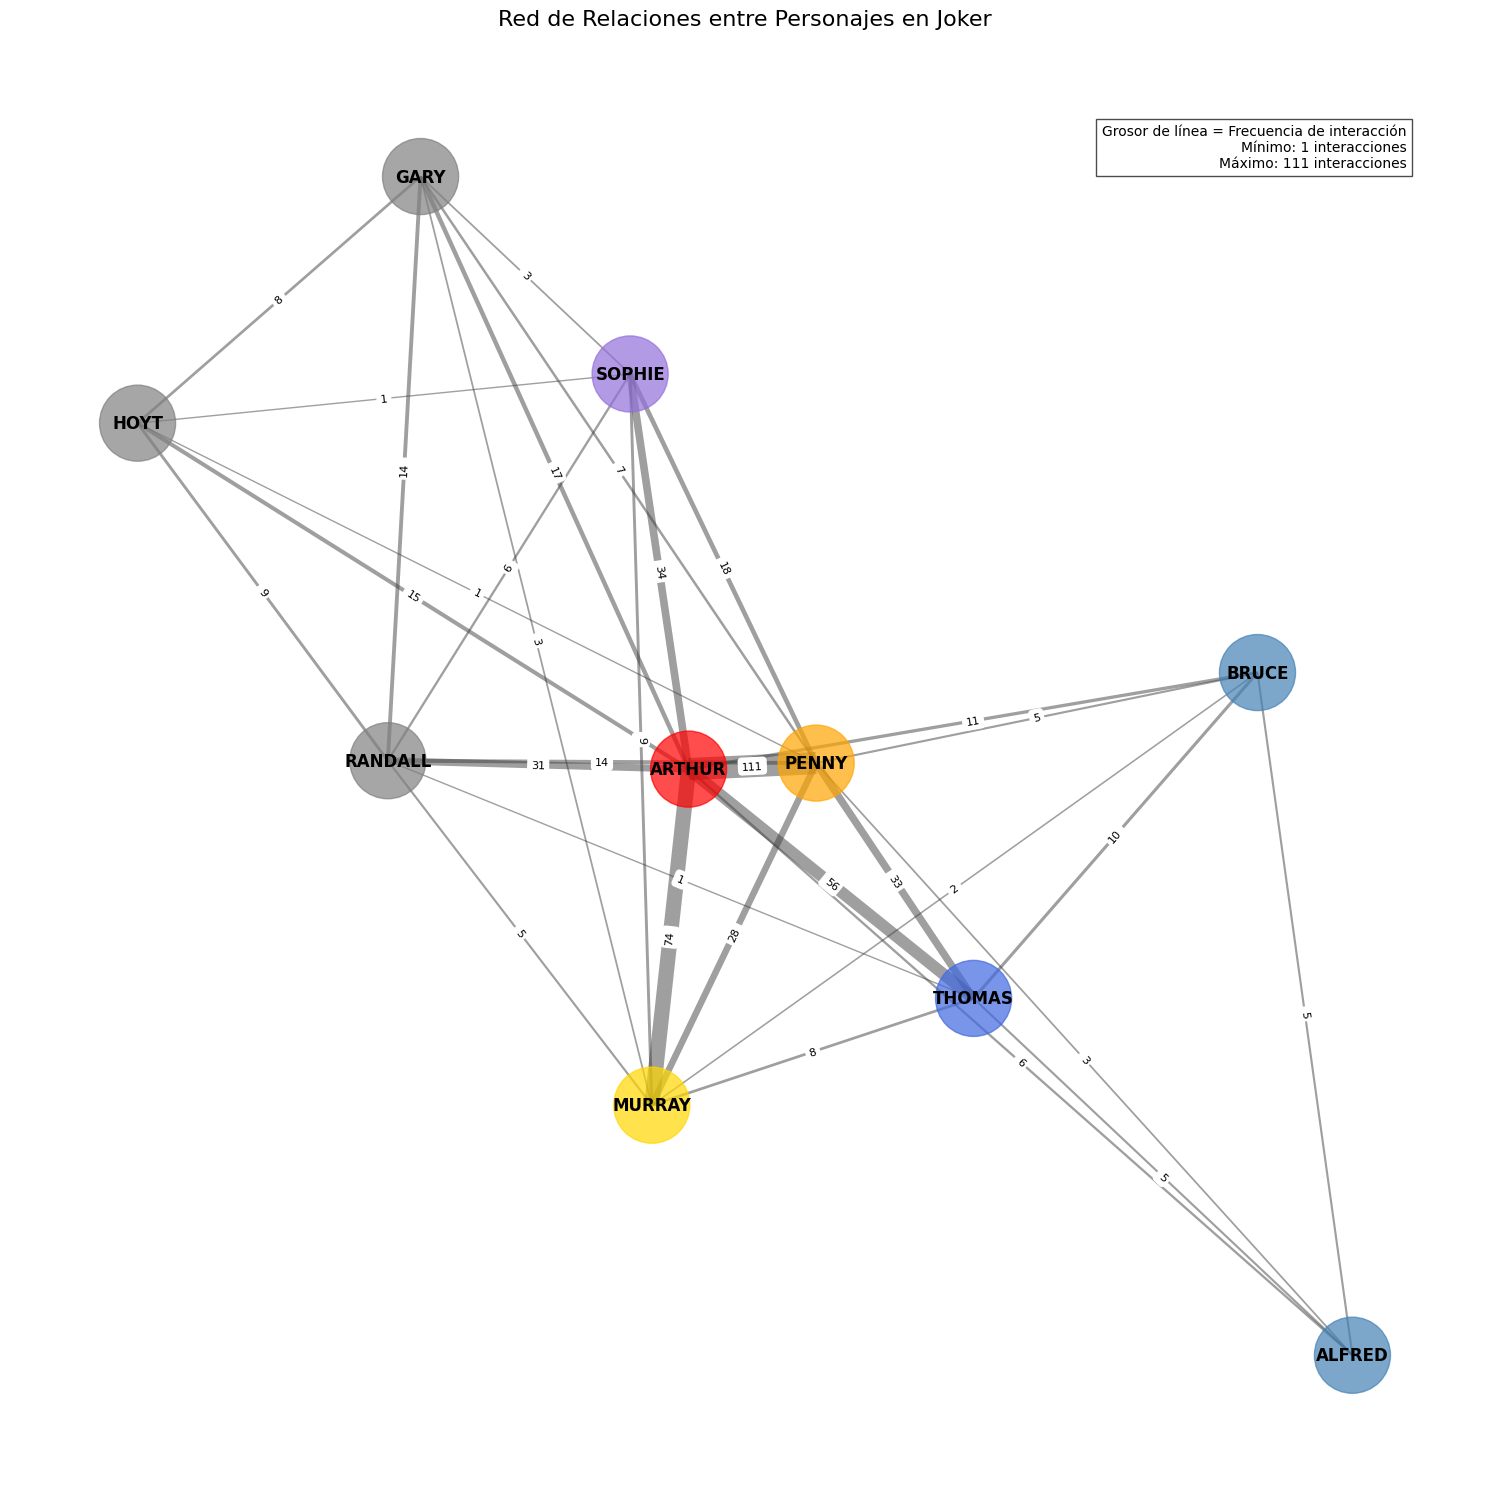


Importancia de personajes (basado en número de interacciones):
ARTHUR: 355
PENNY: 220
MURRAY: 129
THOMAS: 113
RANDALL: 80
SOPHIE: 71
GARY: 52
HOYT: 34
BRUCE: 33
ALFRED: 19

Interacciones más significativas:
ARTHUR - PENNY: 111
ARTHUR - MURRAY: 74
ARTHUR - SOPHIE: 34
ARTHUR - THOMAS: 56
ARTHUR - RANDALL: 31
ARTHUR - GARY: 17
ARTHUR - HOYT: 15
ARTHUR - ALFRED: 6
ARTHUR - BRUCE: 11
PENNY - MURRAY: 28
PENNY - SOPHIE: 18
PENNY - THOMAS: 33
PENNY - RANDALL: 14
PENNY - GARY: 7
PENNY - HOYT: 1
PENNY - ALFRED: 3
PENNY - BRUCE: 5
MURRAY - SOPHIE: 9
MURRAY - THOMAS: 8
MURRAY - RANDALL: 5
MURRAY - GARY: 3
MURRAY - BRUCE: 2
SOPHIE - RANDALL: 6
SOPHIE - GARY: 3
SOPHIE - HOYT: 1
THOMAS - RANDALL: 1
THOMAS - ALFRED: 5
THOMAS - BRUCE: 10
RANDALL - GARY: 14
RANDALL - HOYT: 9
GARY - HOYT: 8
ALFRED - BRUCE: 5


In [ ]:
import PyPDF2
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter

class CharacterNetworkAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.full_text = ""
        self.characters = {
            'ARTHUR': ['ARTHUR', 'HAPPY', 'JOKER', 'MR FLECK', 'ARTIE'],
            'PENNY': ['PENNY', 'MOM', 'MOTHER', 'MA', 'MRS FLECK'],
            'MURRAY': ['MURRAY', 'FRANKLIN', 'MR FRANKLIN'],
            'SOPHIE': ['SOPHIE', 'SOPHIE DUMOND'],
            'THOMAS': ['THOMAS', 'WAYNE', 'MR WAYNE', 'THOMAS WAYNE'],
            'RANDALL': ['RANDALL'],
            'GARY': ['GARY'],
            'HOYT': ['HOYT', 'MR VAUGHN'],
            'ALFRED': ['ALFRED', 'PENNYWORTH'],
            'BRUCE': ['BRUCE', 'BRUCE WAYNE']
        }
        
    def extract_text(self):
        try:
            with open(self.file_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page in pdf_reader.pages:
                    self.full_text += page.extract_text()
                return True
        except Exception as e:
            print(f"Error al leer el archivo: {str(e)}")
            return False
    
    def find_character_interactions(self):
        interactions = {}
        
        # Inicializar el diccionario de interacciones
        for char1 in self.characters:
            interactions[char1] = {}
            for char2 in self.characters:
                if char1 != char2:
                    interactions[char1][char2] = 0
        
        # Dividir el texto en párrafos o escenas
        scenes = re.split(r'\n\n+', self.full_text)
        
        # Ventana deslizante para detectar interacciones más cercanas
        window_size = 1000  # caracteres
        
        for i in range(0, len(self.full_text) - window_size, window_size // 2): # se recorre el texto con una ventana deslizante de tamaño 1000 caracteres
            window = self.full_text[i:i + window_size].upper() 
            chars_in_window = set() 
            
            for char, aliases in self.characters.items(): # se recorren los personajes y sus alias
                for alias in aliases:
                    if re.search(r'\b' + alias.upper() + r'\b', window):
                        chars_in_window.add(char)
                        break
            
            chars_in_window = list(chars_in_window) # se convierte el conjunto en una lista
            for i, char1 in enumerate(chars_in_window): # se recorren los personajes en la ventana
                for char2 in chars_in_window[i+1:]: # se recorren los personajes restantes en la ventana
                    interactions[char1][char2] += 1 # se incrementa la interacción entre los personajes
                    interactions[char2][char1] += 1 
        
        return interactions

    def create_network_graph(self, interactions):
        G = nx.Graph()
        
        # Definir colores para los nodos principales
        node_colors = {
            'ARTHUR': '#FF0000',    # Rojo
            'PENNY': '#FFA500',     # Naranja
            'MURRAY': '#FFD700',    # Dorado
            'SOPHIE': '#9370DB',    # Púrpura
            'THOMAS': '#4169E1',    # Azul real
            'RANDALL': '#808080',   # Gris
            'GARY': '#808080',      # Gris
            'HOYT': '#808080',      # Gris
            'ALFRED': '#4682B4',    # Azul acero
            'BRUCE': '#4682B4'      # Azul acero
        }
        
        # Añadir nodos
        for char in self.characters:
            G.add_node(char)
        
        # Añadir aristas con pesos
        edge_weights = [] # Para visualización de aristas con diferentes grosores según el peso de la interacción entre personajes
        for char1 in interactions:
            for char2 in interactions[char1]:
                weight = interactions[char1][char2]
                if weight > 0: 
                    G.add_edge(char1, char2, weight=weight) # se añade la arista con el peso de la interacción
                    edge_weights.append(weight) # se añade el peso a la lista de pesos
        
        # Crear la visualización
        plt.figure(figsize=(15, 15))
        plt.title("Red de Relaciones entre Personajes en Joker", 
                 fontsize=16, pad=20)
        
        # Calcular el layout con más espacio entre nodos
        pos = nx.spring_layout(G, k=2, iterations=50)
        
        # Dibujar nodos
        nx.draw_networkx_nodes(G, pos,
                             node_color=[node_colors[node] for node in G.nodes()],
                             node_size=3000,
                             alpha=0.7)
        
        # Dibujar etiquetas
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
        
        # Mejorar la visualización de las aristas
        edges = G.edges()
        weights = [G[u][v]['weight'] for u, v in edges]
        
        # Asegurar que no haya división por cero para normalizar los pesos
        max_weight = max(weights) if weights else 1
        min_weight = min(weights) if weights else 0
        
        if max_weight == min_weight:
            normalized_weights = [5] * len(weights)  # Peso fijo si todos son iguales
        else:
            normalized_weights = [(w-min_weight)/(max_weight-min_weight) * 15 + 1 for w in weights]
        
        # Dibujar aristas con mayor contraste en los grosores
        nx.draw_networkx_edges(G, pos,
                             width=normalized_weights,
                             alpha=0.5,
                             edge_color='#404040')  # Gris más oscuro
        
        # Añadir peso de las aristas como etiquetas
        edge_labels = {(u,v): G[u][v]['weight'] for u,v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
        
        # Añadir leyenda
        plt.text(0.95, 0.95, 
                'Grosor de línea = Frecuencia de interacción\n' +
                f'Mínimo: {min_weight} interacciones\n' +
                f'Máximo: {max_weight} interacciones', 
                fontsize=10, ha='right', va='top',
                bbox=dict(facecolor='white', alpha=0.7),
                transform=plt.gca().transAxes)
        
        plt.axis('off')
        plt.tight_layout()
        
        return G, weights

    def analyze_character_importance(self):
        interactions = self.find_character_interactions()
        importance = {}
        
        for char in interactions:
            importance[char] = sum(interactions[char].values())
            
        return dict(sorted(importance.items(), key=lambda x: x[1], reverse=True))

# Uso del analizador
analyzer = CharacterNetworkAnalyzer("joker_new_final.pdf")
if analyzer.extract_text():
    interactions = analyzer.find_character_interactions()
    G, weights = analyzer.create_network_graph(interactions)
    plt.show()
    
    print("\nImportancia de personajes (basado en número de interacciones):")
    print("===========================================================")
    importance = analyzer.analyze_character_importance()
    for char, score in importance.items():
        print(f"{char}: {score}")
    
    print("\nInteracciones más significativas:")
    print("================================")
    edges = list(G.edges())
    for edge, weight in zip(edges, weights):
        print(f"{edge[0]} - {edge[1]}: {weight}")

Análisis de Relaciones entre Personajes en Joker

* La visualización de la red de personajes revela varios aspectos interesantes sobre las dinámicas relacionales en la película:

Personajes Centrales
- Arthur/Joker

Es claramente el nodo central de la red, como se esperaría del protagonista
- Su interacción más fuerte es con Penny (111 interacciones), reflejando la importancia central de la relación madre-hijo en la narrativa
Mantiene conexiones significativas con prácticamente todos los personajes, pero de intensidad variable

Penny (Madre)

Segunda figura más importante en términos de conexiones
- Sus interacciones más fuertes son con Arthur y Thomas Wayne, lo que refleja el triángulo central de la trama familiar
- La alta frecuencia de interacciones refleja su papel crucial en el desarrollo psicológico de Arthur

Relaciones Clave

Arthur - Penny (111 interacciones)

La relación más intensa de la red
- Fundamental para entender el origen y desarrollo del personaje


Arthur - Murray (74 interacciones)

Segunda relación más significativa
- Representa la conexión de Arthur con su ídolo y eventual víctima


Arthur - Thomas (28 interacciones)

Una relación de intensidad media pero crucial para la trama
- Simboliza el conflicto de clases y la búsqueda de identidad



Personajes Secundarios pero Significativos

- Sophie: Mantiene conexiones moderadas pero significativas, especialmente con Arthur
- Randall: Notable por su conexión con Arthur (31 interacciones), refleja la importancia de las relaciones laborales
- Gary: Aunque tiene menos interacciones, mantiene conexiones con varios personajes

Observaciones Interesantes

- La red muestra una clara jerarquía de relaciones, con Arthur en el centro
- Las conexiones más fuertes tienden a involucrar a los personajes que más impactan en la transformación de Arthur en Joker
- Los personajes secundarios están bien integrados en la red, mostrando la complejidad de la narrativa
- La distribución de las interacciones refleja la naturaleza personal e íntima de la historia

Esta visualización ayuda a entender cómo la película construye su narrativa a través de las relaciones interpersonales, con un fuerte énfasis en las conexiones familiares y las figuras de autoridad que rodean a Arthur.

## Emociones predominantes en la película

Aquí usamos el ScriptAnalyzer para el PDF.

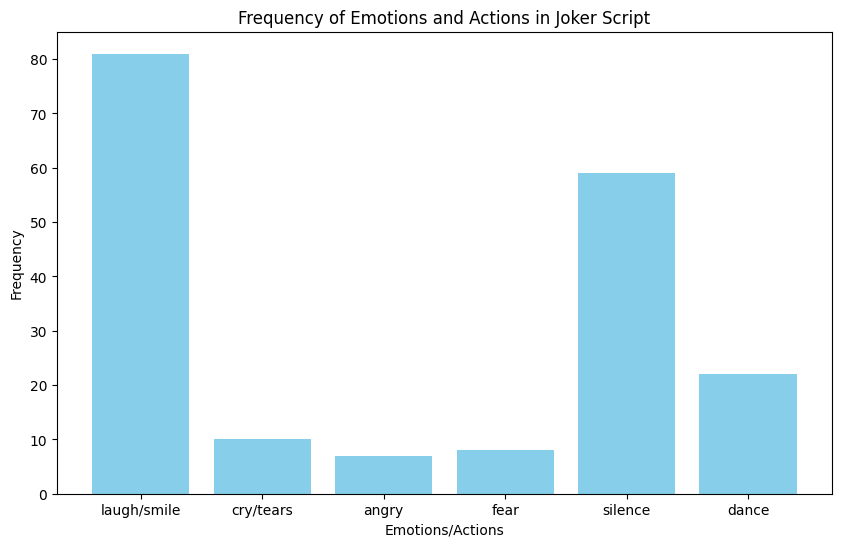

In [5]:

# Create an instance of ScriptAnalyzer
script_analyzer = ScriptAnalyzer("joker_new_final.pdf")

# Extract text from the script
if script_analyzer.extract_text():
    # Analyze emotions and actions
    emotions = script_analyzer.analyze_emotions_and_actions()
    
    # Plot the emotions in a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(emotions.keys(), emotions.values(), color='skyblue')
    plt.xlabel('Emotions/Actions')
    plt.ylabel('Frequency')
    plt.title('Frequency of Emotions and Actions in Joker Script')
    plt.show()

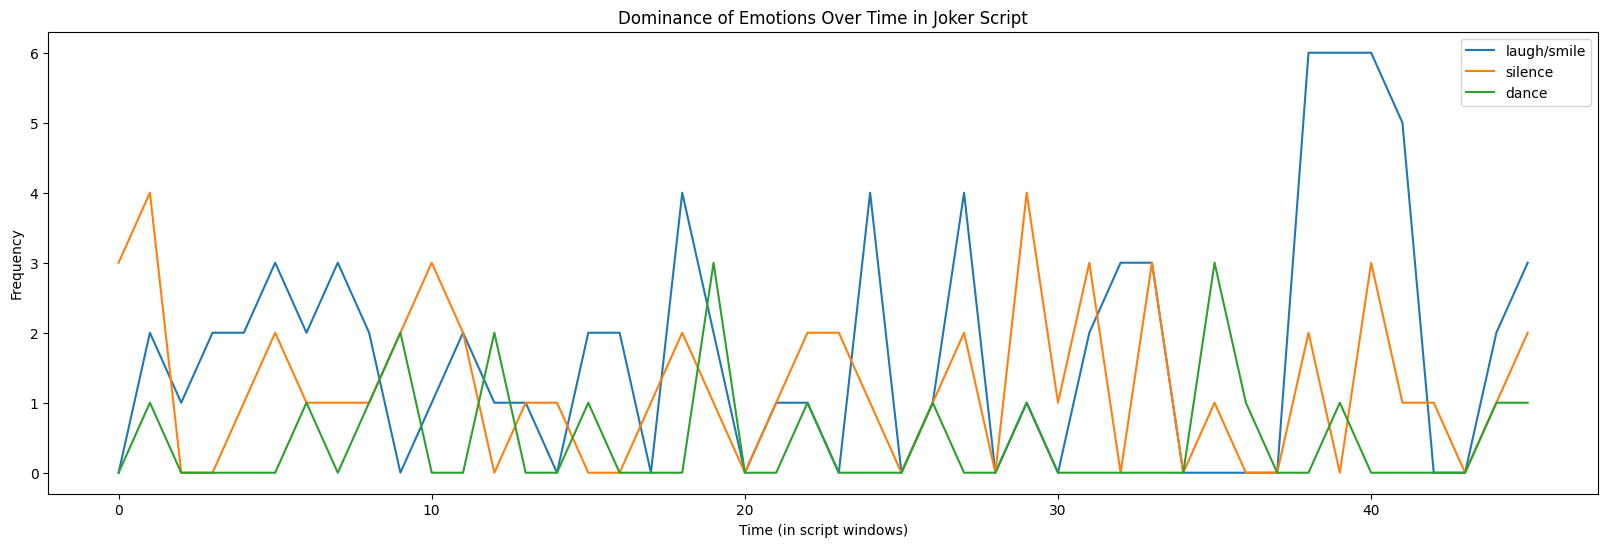

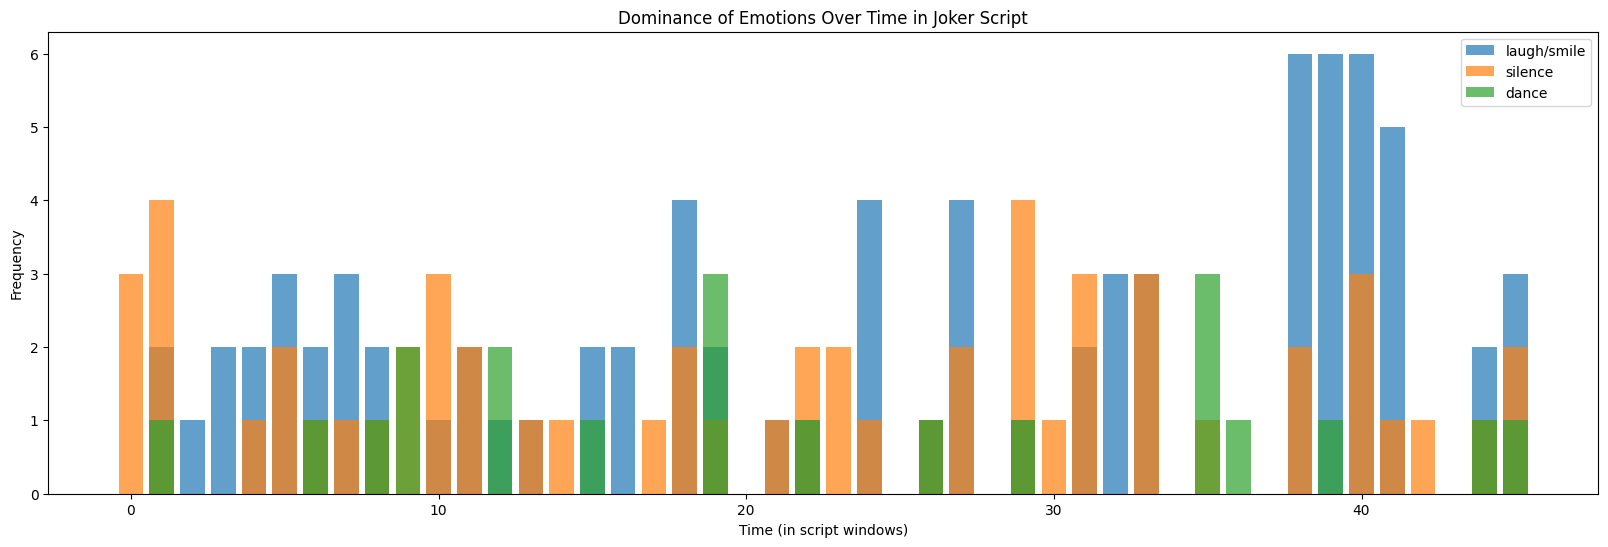

In [8]:
import matplotlib.pyplot as plt

# Extract the full text from the script
full_text = script_analyzer.full_text.lower()

# Define the emotions to track
emotions_to_track = ['laugh/smile', 'silence', 'dance']

# Define the regex patterns for each emotion
emotion_patterns = {
    'laugh/smile': r'\b(laughs?|smiles?|grinning|chuckles?)\b',
    'silence': r'\b(silence|quiet|pause|beat)\b',
    'dance': r'\b(dance|dancing|moves)\b'
}

# Define the window size for analysis (number of words)
window_size = 500

# Split the script into words
words = full_text.split()

# Initialize a dictionary to store the counts of each emotion over time
emotion_counts = {emotion: [] for emotion in emotions_to_track}

# Analyze the script in windows
for i in range(0, len(words) - window_size, window_size):
    window = ' '.join(words[i:i + window_size])
    for emotion, pattern in emotion_patterns.items():
        count = len(re.findall(pattern, window))
        emotion_counts[emotion].append(count)

# Plot the results
plt.figure(figsize=(20, 6))
for emotion in emotions_to_track:
    plt.plot(emotion_counts[emotion], label=emotion)

plt.xlabel('Time (in script windows)')
plt.ylabel('Frequency')
plt.title('Dominance of Emotions Over Time in Joker Script')
plt.legend()
# Plot the results using bars instead of line chart
plt.figure(figsize=(20, 6))
for emotion in emotions_to_track:
    plt.bar(range(len(emotion_counts[emotion])), emotion_counts[emotion], label=emotion, alpha=0.7)

plt.xlabel('Time (in script windows)')
plt.ylabel('Frequency')
plt.title('Dominance of Emotions Over Time in Joker Script')
plt.legend()
plt.show()

# Resumen y Conclusiones

## Hallazgos Principales

### 1. Análisis de Redes de Personajes
- Arthur/Joker como nodo central (111 interacciones con Penny)
- Conexiones significativas con Murray (74 interacciones)
- Red compleja de relaciones secundarias

### 2. Patrones Emocionales
- Predominancia de risa/sonrisa (81 menciones)
- Alto nivel de silencio (59 menciones)
- Presencia significativa de baile (22 menciones)
- Menor frecuencia de ira (7) y miedo (8)

### 3. Evolución Narrativa
La visualización temporal muestra:
- Incremento de elementos de risa hacia el final
- Patrones de silencio distribuidos
- Momentos de baile como puntos clave

## Conclusiones
El análisis cuantitativo revela:
1. Estructura narrativa compleja centrada en relaciones interpersonales
2. Evolución emocional significativa del protagonista
3. Uso estratégico del contraste entre risa y silencio
4. Baile como elemento narrativo recurrente

## Implicaciones
Este análisis demuestra el potencial de las herramientas computacionales para:
- Revelar patrones narrativos
- Cuantificar elementos dramáticos
- Visualizar estructuras relacionales en guiones cinematográficos